# Diabetes Prediction 

 Finding best model for Diabetes Prediction  
 Dataset :https://www.kaggle.com/johndasilva/diabetes


In [1]:
# Import data analysis libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pickle

# Exploring the dataset

In [2]:
# Load the dataset
df = pd.read_csv("Diabetes_Prediction.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
# Display all the columns of dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Number of rows and columns of the dataset
df.shape

(2000, 9)

In [5]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
# Summary of statistics of columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
# Different datatypes for each columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# True for a column having null values, else False
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
# Renaming the one of the columns
df=df.rename(columns={'DiabetesPedigreeFunction':'Diab_Pedig_Funct'})
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_Pedig_Funct,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Outcome '0' means No diabetes, outcome '1' means diabetes

In [10]:
df.groupby("Outcome").size()

Outcome
0    1316
1     684
dtype: int64

### From 2000 data points, 1316 are labeled as 0 and 684 as 1

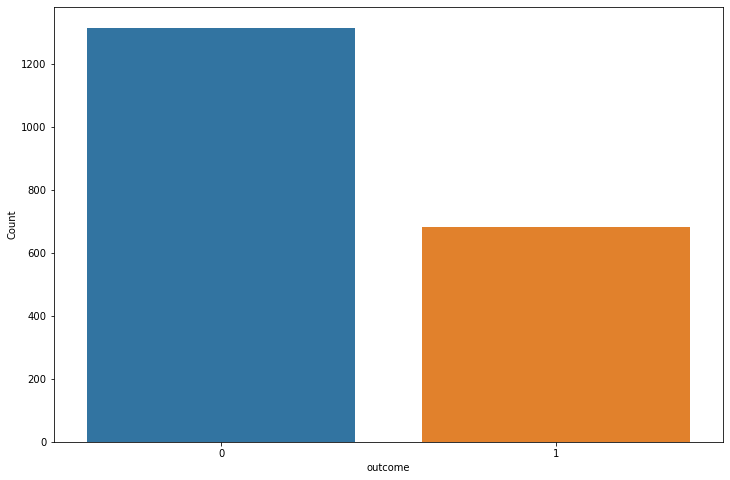

In [11]:
# Plotting the Outcome column
plt.figure(figsize=(12,8))
sns.countplot(x='Outcome', data=df)
# Headings
plt.xlabel('outcome')
plt.ylabel('Count')
plt.show()


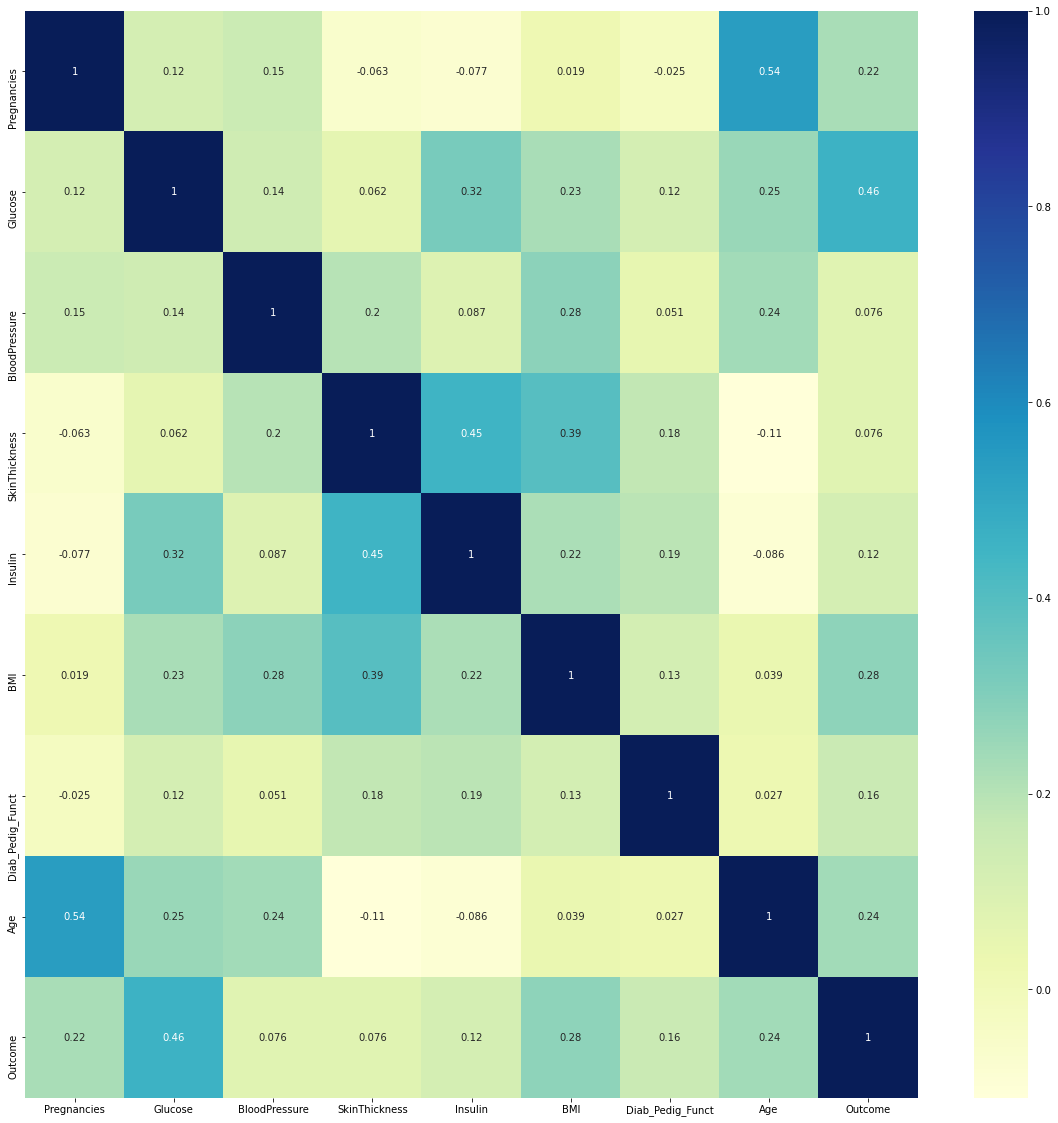

In [12]:
#correlations of each features in the taken dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")


In [13]:
# Correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_Pedig_Funct,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
Diab_Pedig_Funct,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


# Data  Cleaning

In [14]:
# Replace the '0' values present in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df1 = df.copy(deep=True)
df1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df1[
    ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
].replace(0, np.NaN)
df1.isnull().sum()

Pregnancies           0
Glucose              13
BloodPressure        90
SkinThickness       573
Insulin             956
BMI                  28
Diab_Pedig_Funct      0
Age                   0
Outcome               0
dtype: int64

In [15]:
# Replacing NaN values based on the mean of each column.
df1 = df1.apply(lambda x: x.fillna(x.mean()), axis=0)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_Pedig_Funct,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


# Model Building

In [16]:
# Split train and test data

from sklearn.model_selection import train_test_split

feature_columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "Insulin",
    "BMI",
    "Diab_Pedig_Funct",
    "Age",
    "SkinThickness",
]
predicted_class = ["Outcome"]
# Feature elements
X = df1[feature_columns].values
# Target element
y = df1[predicted_class].values.ravel()

# Split the train data(70%) and test data(30%) 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=5
)
print("X_train size: {}, X_test size: {}".format(X_train.shape, X_test.shape))

X_train size: (1400, 8), X_test size: (600, 8)


## Feature Scaling

In [17]:
# Import standardscalar
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diab_Pedig_Funct,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


# Use GridSearchCV

In [18]:
# Essential libraries to get best model for taken dataset
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

# Different models with different hyperparameters

def best_model(X, y):
    models = {
        "logistic_regression": {
            "model": LogisticRegression(solver="lbfgs", multi_class="auto"),
            "parameters": {"C": [1, 5, 10]},
        },
        "decision_tree": {
            "model": DecisionTreeClassifier(splitter="best"),
            "parameters": {"criterion": ["gini", "entropy"], "max_depth": [5, 10]},
        },
        "random_forest": {
            "model": RandomForestClassifier(criterion="gini"),
            "parameters": {"n_estimators": [10, 15, 20, 50, 100, 200]},
        },
        "svm": {
            "model": SVC(gamma="auto"),
            "parameters": {"C": [1, 10, 20], "kernel": ["rbf", "linear"]},
        },
    }

    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=5)

    for model_name, model_params in models.items():
        gs = GridSearchCV(
            model_params["model"],
            model_params["parameters"],
            cv=cv_shuffle,
            return_train_score=False,
        )
        gs.fit(X, y)
        scores.append(
            {
                "model": model_name,
                "best_parameters": gs.best_params_,
                "score": gs.best_score_,
            }
        )

    return pd.DataFrame(scores, columns=["model", "best_parameters", "score"])


best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.752857
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.889286
2,random_forest,{'n_estimators': 100},0.937143
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.846429


### Based on above output, I can conclude that random_forest with {'n_estimators': 20} and score 0,937143(94%) is the best model for Daiabetes Prediction.

In [19]:
# create and fine tune the Random Forest model using hyperparameter optimization
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
##Fitting model with trainig data
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Model Evaluation

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix for testing set
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[394,  10],
       [  9, 187]], dtype=int64)

In [21]:
# Accuracy Score on test set
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
print("Accuracy of test set: {}%".format(accuracy))

Accuracy of test set: 96.83%


In [22]:
# Confusion Matrix for training set
y_train_pred = classifier.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[912,   0],
       [  2, 486]], dtype=int64)

In [23]:
# Accuracy Score on tarin set
accuracy = round(accuracy_score(y_train, y_train_pred), 4) * 100
print("Accuracy on trainning set: {}%".format(accuracy))

Accuracy on trainning set: 99.86%
